<a href="https://colab.research.google.com/github/mainarel/Numerical_methods_7/blob/main/Lab4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse import csr_matrix
import math

**Условия задачи:** \\
*Разностные методы решения задачи Дирихле для двумерного уравнения Пуассона в
прямоугольнике. Поставить задачу Дирихле. Метод установления.
Даны точные решения.* \\
$$ u(x,y) = 5(-2x+3y)cos(3x+2y)+3y^2 \\
0 \leq x \leq 1, \\ 0 \leq y \leq 2 
$$

*Вычислим производные:*
$$
u_{xx} = 60sin(3x+2y) - 45cos(3x+2y)(-2x+3y) \\
u_{yy} = -60sin(3x+2y)-20cos(3x+2y)(-2x+3y)+6 \\
f(x,y)=u_{xx} + u_{yy}  = -65cos(3x+2y)(-2x+3y)+6
$$

*Ограничения:*
$$
\begin{cases}
u(0, y)=\mu(0, y)=\mu_{x}^{(1)}(y) = 15ycos(2y)+3y^2
\\
u(1, y)=\mu(1, y)=\mu_{x}^{(2)}(y) = 5(-2+3y)cos(3+2y)+3y^2
\\
u(x, 0)=\mu(x, 0)=\mu_{y}^{(1)}(x) = -10xcos(3x)
\\
u(x, 2)=\mu(x, 2)=\mu_{y}^{(2)}(x) = 5(-2x+6)cos(3x+4)+12
\end{cases}
$$

Граничные условия, аналитическое решение:


In [7]:
def f(x,y):
  return (-65*np.cos(3*x+2*y)*(-2*x+3*y)+6)

def solution(x,y):
  return 5*(-2*x+3*y)*np.cos(3*x+2*y)+3*y**2
    
def mu1_x(y):
     return 15*y*np.cos(2*y)+3*y**2

def mu2_x(y):
     return  5*(-2+3*y)*np.cos(3+2*y)+3*y**2

def mu1_y(x):
     return -10*x*np.cos(3*x)

def mu2_y(x):
     return 5*(-2*x+6)*np.cos(3*x+4)+12


In [8]:
def eqsol(f, mu1_x, mu2_x, mu1_y, mu2_y, xmin=0, xmax=1, ymin=0, ymax=2, hx = 0.05, hy = 0.05 , epsilon = 1e-5):
  
    nx = int((xmax - xmin) / hx)+ 1
    x = np.linspace(xmin,xmax, nx)
   
    ny = int((ymax - ymin) / hy) +1
    y = np.linspace(ymin,ymax, ny)

    u = np.zeros((len(x), len(y)))

    prev_u = np.zeros((len(x), len(y)))
    curr_u = np.zeros((len(x), len(y)))

    prev_u[ 0, :] = [mu1_x(element) for element in y]
    prev_u[-1, :] = [mu2_x(element) for element in y]
    prev_u[:,  0] = [mu1_y(element) for element in x]
    prev_u[:, -1] = [mu2_y(element) for element in x]

    dt = hx**2/4

    while np.max(np.abs(prev_u - curr_u)) > epsilon:

          tmp = curr_u.copy() 
          curr_u[0 , :] = [mu1_x(element) for element in y]
          curr_u[-1, :] = [mu2_x(element) for element in y]
          curr_u[:,  0] = [mu1_y(element) for element in x]
          curr_u[:, -1] = [mu2_y(element) for element in x]


          for i in range(1, len(x)-1):
                for j in range(1, len(y)-1):
                    curr_u[i, j] = (1 - 2 * dt * ((1 / hx**2)+(1 / hy**2))) * prev_u[i, j] + dt * ((1 / hx**2) * (prev_u[i+1,j] + prev_u[i-1,j]) \
                                               + (1 / hy**2) * (prev_u[i,j+1] + prev_u[i,j-1]) - f(x[i], y[j]))
          prev_u = tmp.copy()
         #print(np.max(np.abs(prev_u - curr_u)))
    u = curr_u.copy()
    return u

In [9]:
hx0 = 0.05 / np.sqrt(2)
hy0 = 0.05 / np.sqrt(2)
xmin = 0
xmax = 1
ymin = 0
ymax = 2


nx = int((xmax - xmin) / hx0) +1
x0, hx0 = np.linspace(xmin,xmax, nx, retstep = True)

ny = int((ymax - ymin) / hy0) +1
y0,hy0 = np.linspace(ymin,ymax, ny, retstep = True)


In [10]:
numerical_sol = eqsol(f, mu1_x, mu2_x, mu1_y, mu2_y, xmin=0, xmax=1, ymin=0, ymax=2, hx=hx0, hy=hy0, epsilon = 1e-5)

analytical_solution = np.array([solution(i, j) for i in x0 for j in y0 ])
analytical_solution = analytical_solution.reshape((len(x0), len(y0)))

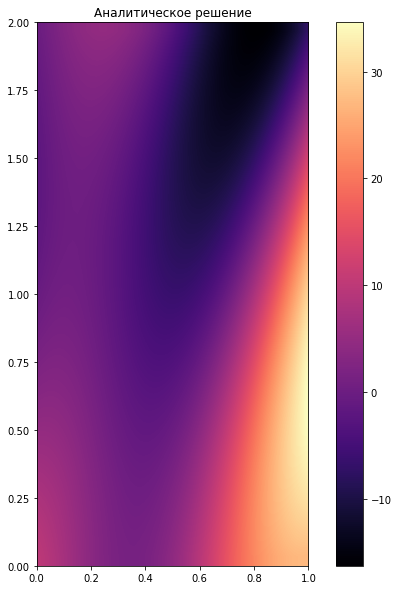

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(analytical_solution, extent=[xmin, xmax, ymin, ymax], cmap='magma', interpolation='bilinear')
plt.title("Аналитическое решение")
plt.colorbar()
plt.show()

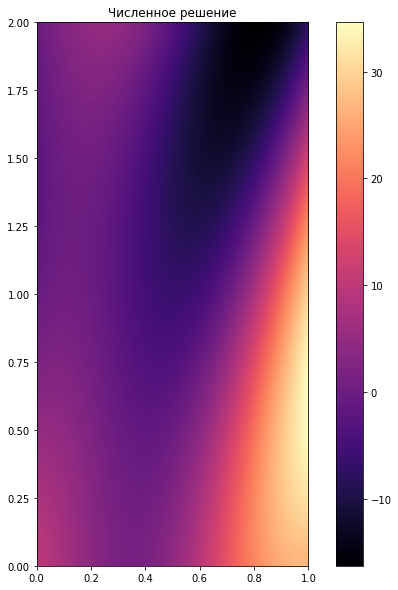

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(numerical_sol, extent=[xmin, xmax, ymin, ymax], cmap='magma', interpolation='bilinear')
plt.title("Численное решение")
plt.colorbar()
plt.show()

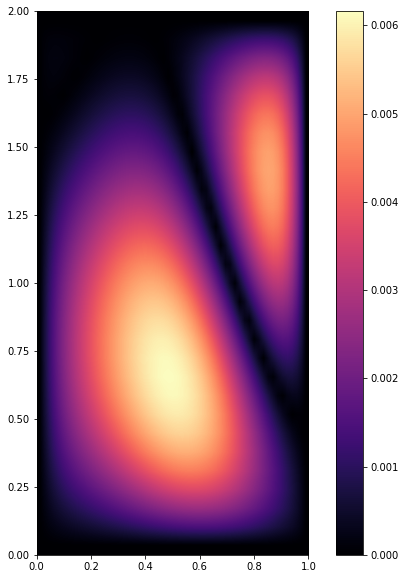

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(np.abs(analytical_solution-numerical_sol), extent=[xmin, xmax, ymin, ymax], cmap='magma', interpolation='bilinear', origin='lower')
plt.colorbar()
plt.show()

In [14]:
print(np.max(np.abs(analytical_solution-numerical_sol)))

0.0061606423125883936


In [15]:
hx00 = 0.05 
hy00 = 0.05 
xmin = 0
xmax = 1
ymin = 0
ymax = 2


nx = int((xmax - xmin) / hx00) +1
x00, hx00 = np.linspace(xmin,xmax, nx, retstep = True)

ny = int((ymax - ymin) / hy00) +1
y00,hy00 = np.linspace(ymin,ymax, ny, retstep = True)


numerical_sol0 = eqsol(f, mu1_x, mu2_x, mu1_y, mu2_y, xmin=0, xmax=1, ymin=0, ymax=2, hx=hx00, hy=hy00, epsilon = 1e-5)


In [19]:
analytical_solution = np.array([solution(i, j) for i in x00 for j in y00 ])
analytical_solution = analytical_solution.reshape((len(x00), len(y00)))

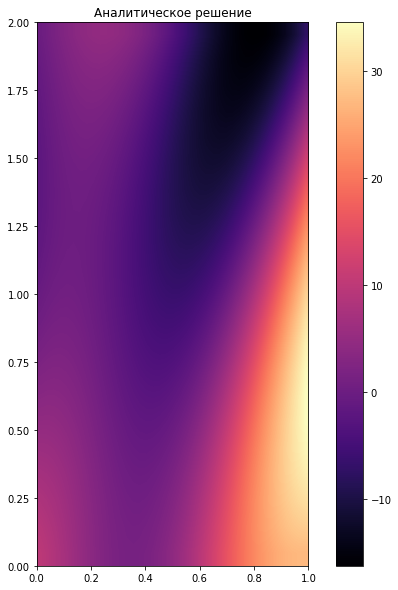

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(analytical_solution, extent=[xmin, xmax, ymin, ymax], cmap='magma', interpolation='bilinear')
plt.title("Аналитическое решение")
plt.colorbar()
plt.show()

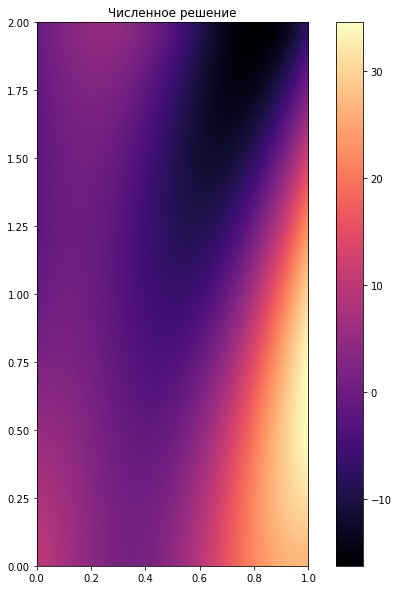

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(numerical_sol0, extent=[xmin, xmax, ymin, ymax], cmap='magma', interpolation='bilinear')
plt.title("Численное решение")
plt.colorbar()
plt.show()

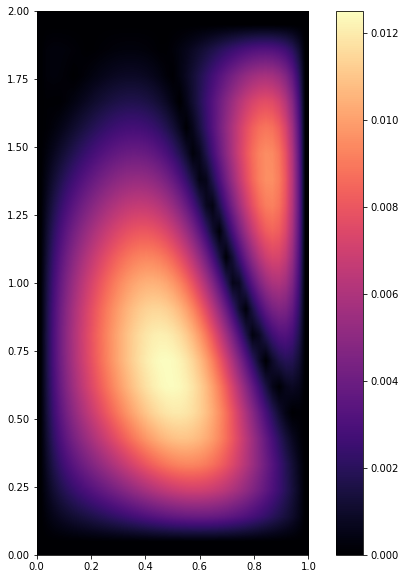

0.012510777609573864


In [22]:
plt.figure(figsize=(10,10))
plt.imshow(np.abs(analytical_solution-numerical_sol0), extent=[xmin, xmax, ymin, ymax], cmap='magma', interpolation='bilinear', origin='lower')
plt.colorbar()
plt.show()

print(np.max(np.abs(analytical_solution-numerical_sol0)))